In [37]:
# import os
import numpy as np
import time
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
plt.style.use('seaborn')

# my implementation of KNN
# from KNN import KNNClassifier

/tmp/ipykernel_18266/2418688968.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [38]:
file = "data.npy"
data = np.load(file, allow_pickle=True)

"""
delete the 5th column
data = np.delete(data, 4, axis=1)

check if all the game id's are unique
np.unique(data[:, 0]).shape[0] 
data = np.delete(data, 0, axis=1)

print(data.shape, end='\n\n')
"""

"\ndelete the 5th column\ndata = np.delete(data, 4, axis=1)\n\ncheck if all the game id's are unique\nnp.unique(data[:, 0]).shape[0] \ndata = np.delete(data, 0, axis=1)\n\nprint(data.shape, end='\n\n')\n"

#### 2.2.1 Task 1 [10]

In [39]:
# get all the unique values for labels
# Transposed for easier reading
x = np.array(np.unique(data[:, 3], return_counts=True)).T
x = x[x[:, 1].argsort()]  # sor
# print(x.shape)

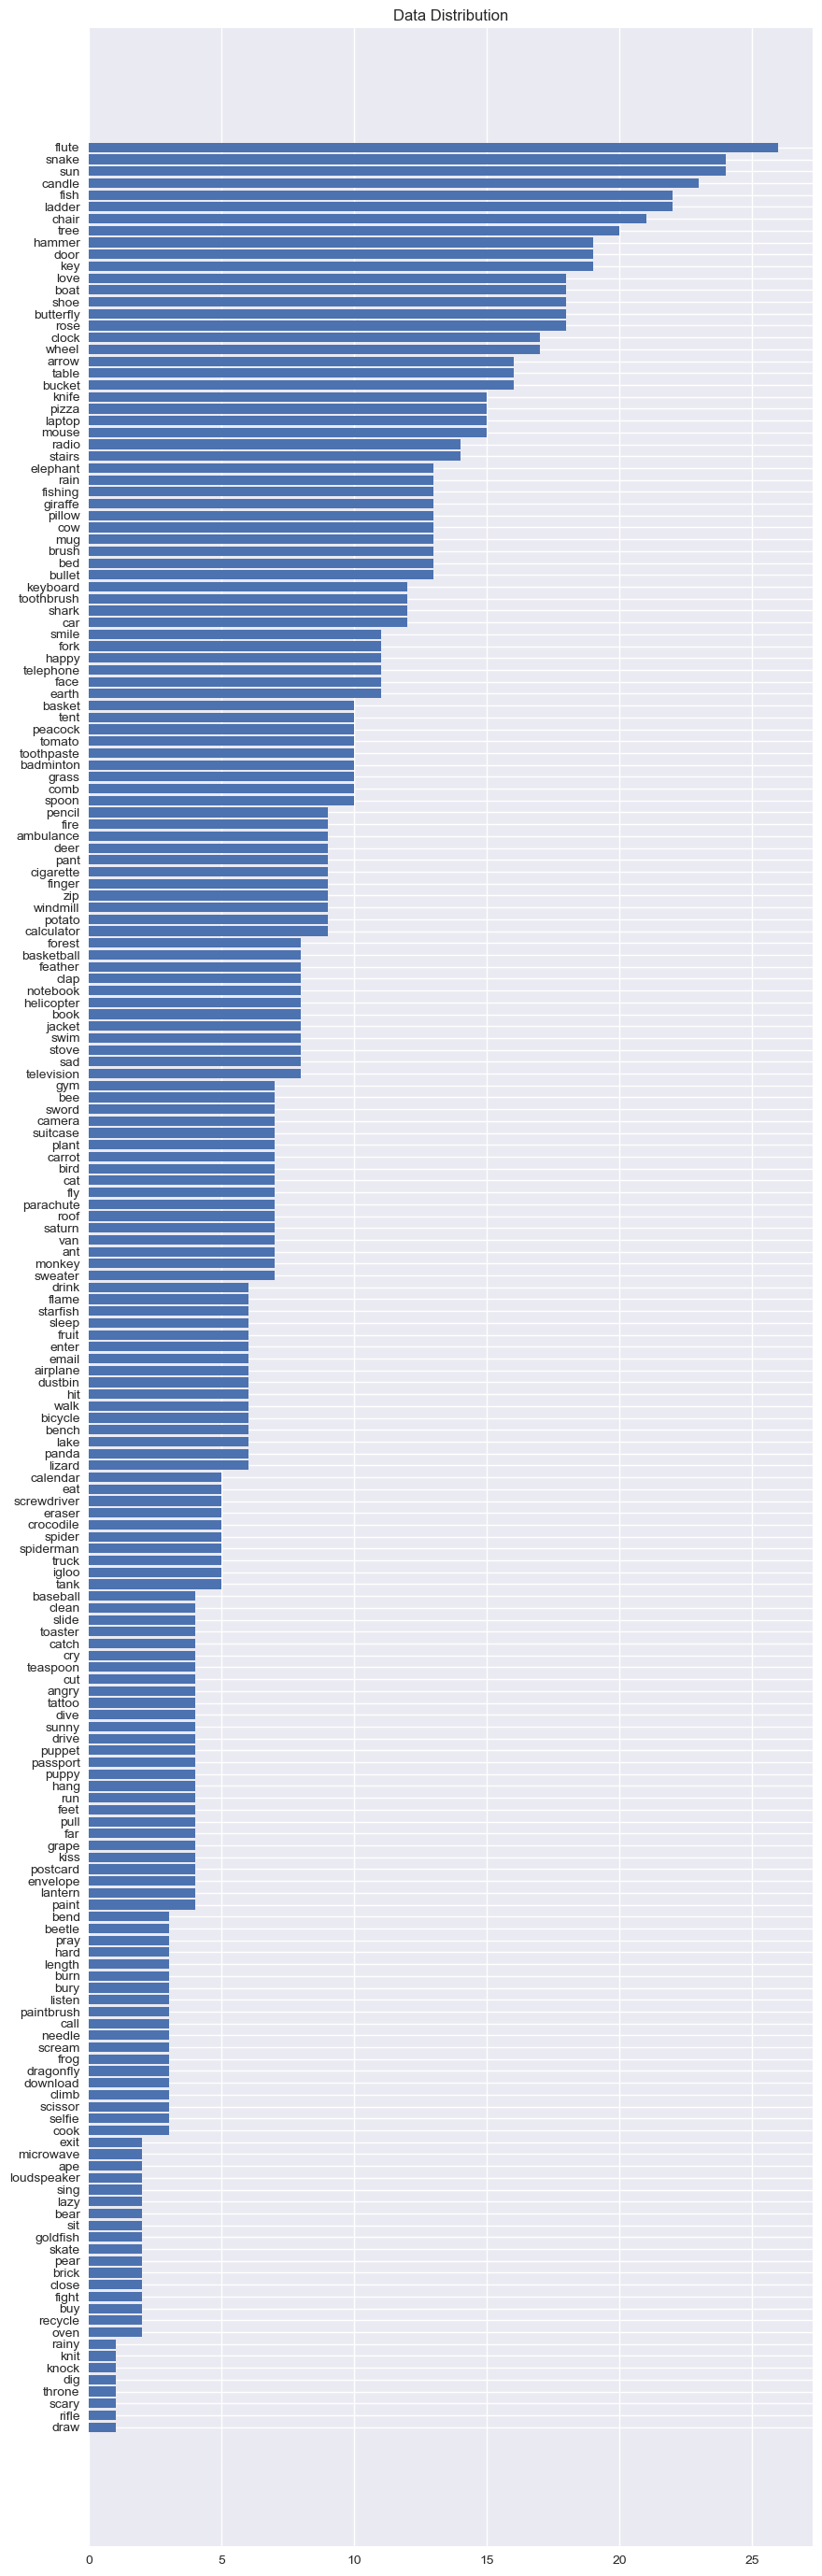

In [40]:
plt.figure(figsize=(10, 35))


num_bars = x.shape[0]
bars = plt.barh(x[:, 0], x[:, 1])


# plt.xlabel('X Label')
# plt.ylabel('Y Label')
plt.title('Data Distribution')  # Set your plot title

# Show the plot
plt.show()

#### $k$ is the number of nearest neighbors
#### $k$ must be $odd$
#### $k \;< \;\sqrt{n}$
#### Here $k \;<\; \sqrt{1500}$
#### $k \;< \;39$

In [41]:
"""
resnet_index = 1
vit_index = 2
label_index = 3

X_resnet = []
for d in data[:, resnet_index]:
    X_resnet.append(d.reshape(-1))
X_resnet = np.array(X_resnet)

X_vit = []
for d in data[:, vit_index]:
    X_vit.append(d.reshape(-1))
X_vit = np.array(X_vit)

y = data[:, label_index]

X_resnet_train, X_resnet_test, y_resnet_train, y_resnet_test = train_test_split(X_resnet, y, test_size=0.2, random_state=2)
X_vit_train, X_vit_test, y_vit_train, y_vit_test = train_test_split(X_vit, y, test_size=0.2, random_state=2)
X_resnet_train, X_resnet_val, y_resnet_train, y_resnet_val = train_test_split(X_resnet, y, val_size=0.2, random_state=2)
X_vit_train, X_vit_val, y_vit_train, y_vit_val = train_test_split(X_vit, y, val_size=0.2, random_state=2)
"""

'\nresnet_index = 1\nvit_index = 2\nlabel_index = 3\n\nX_resnet = []\nfor d in data[:, resnet_index]:\n    X_resnet.append(d.reshape(-1))\nX_resnet = np.array(X_resnet)\n\nX_vit = []\nfor d in data[:, vit_index]:\n    X_vit.append(d.reshape(-1))\nX_vit = np.array(X_vit)\n\ny = data[:, label_index]\n\nX_resnet_train, X_resnet_test, y_resnet_train, y_resnet_test = train_test_split(X_resnet, y, test_size=0.2, random_state=2)\nX_vit_train, X_vit_test, y_vit_train, y_vit_test = train_test_split(X_vit, y, test_size=0.2, random_state=2)\nX_resnet_train, X_resnet_val, y_resnet_train, y_resnet_val = train_test_split(X_resnet, y, val_size=0.2, random_state=2)\nX_vit_train, X_vit_val, y_vit_train, y_vit_val = train_test_split(X_vit, y, val_size=0.2, random_state=2)\n'

#### 2.3.1 Task 1 [30]

In [42]:
import numpy as np
import time
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


class KNNClassifier:
    def __init__(self, k=3, distance_metric='euclidean', encoder="VIT"):
        self.k = k
        self.distance_metric = distance_metric
        self.encoder = encoder

        file = "data.npy"
        data = np.load(file, allow_pickle=True)

        resnet_index = 1
        vit_index = 2
        label_index = 3

        y = data[:, label_index]

        if self.encoder == "ResNet":

            X_resnet = []
            for d in data[:, resnet_index]:
                X_resnet.append(d.reshape(-1))
            X_resnet = np.array(X_resnet)
            X_resnet_train, X_resnet_test, y_resnet_train, y_resnet_test = train_test_split(
                X_resnet, y, test_size=0.2, random_state=2)

            self.X_train = X_resnet_train
            self.y_train = y_resnet_train
            self.X_test = X_resnet_test
            self.y_test = y_resnet_test

        elif self.encoder == "VIT":

            X_vit = []
            for d in data[:, vit_index]:
                X_vit.append(d.reshape(-1))
            X_vit = np.array(X_vit)
            X_vit_train, X_vit_test, y_vit_train, y_vit_test = train_test_split(
                X_vit, y, test_size=0.2, random_state=2)

            self.X_train = X_vit_train
            self.y_train = y_vit_train
            self.X_test = X_vit_test
            self.y_test = y_vit_test

        self.min = self.X_train.min(axis=0)
        self.max = self.X_train.max(axis=0)

        # self.mean = self.X_train.mean(axis=0)
        # self.std = self.X_train.std(axis=0)

        self.X_train = self.min_max_normalization(self.X_train)

    def min_max_normalization(self, x):
        return (x - self.min) / (self.max - self.min)

    def euclidean_distance(self, x):
        return np.sqrt(np.sum((self.X_train - x)**2, axis=1))

    def manhattan_distance(self, x):
        return np.sum(np.abs(self.X_train - x), axis=1)

    def cosine_distance(self, x):
        return (1 - (np.sum(self.X_train * x, axis=1) / (np.sqrt(np.sum(self.X_train**2, axis=1)) * np.sqrt(np.sum(x**2)))))

    def minkowski_distance(self, x, p=3):
        return np.sum(np.abs(self.X_train - x)**p, axis=1)**(1/p)

    def predict(self, X):
        predictions = []
        # inference_time = []

        for x in X:
            x = self.min_max_normalization(x)

            # start_time = time.time()

            prediction = self.real_predict(x)
            # inference_time.append(time.time() - start_time)
            predictions.append(prediction)

        return np.array(predictions)

    def real_predict(self, x):
        distances = np.zeros(self.X_train.shape[0])
        if self.distance_metric == 'euclidean':
            distances = self.euclidean_distance(x)
        elif self.distance_metric == 'cosine':
            distances = self.cosine_distance(x)
        elif self.distance_metric == 'manhattan':
            distances = self.manhattan_distance(x)
        elif self.distance_metric == 'minkowski':
            distances = self.minkowski_distance(x)

        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = self.y_train[k_indices]
        k_nearest_distances = distances[k_indices]

        unique_labels = np.unique(k_nearest_labels)

        # Calculate weights based on inverse distances
        weights = 1 / (k_nearest_distances + 1e-10)  # Avoid division by zero

        # Create a dictionary to store the weighted counts for each label
        weighted_count_dict = {}
        for label in unique_labels:
            indices = np.where(k_nearest_labels == label)
            weighted_count_dict[label] = np.sum(weights[indices])
        # print(weighted_count_dict)

        # Find the label with the highest weighted count
        highest_weighted_label = max(
            weighted_count_dict, key=weighted_count_dict.get)

        return highest_weighted_label

    def get_inference_and_scores(self):

        start = time.time()
        prediction = self.predict(self.X_test)
        inference_time = time.time() - start

        dict = classification_report(
            y_pred=prediction, y_true=self.y_test, zero_division=0, output_dict=True)

        return {
            "prediction": prediction,
            "dict": dict,
            "inference_time": inference_time
        }

'\nclass KNNClassifier:\n    def __init__(self, k=3, distance_metric=\'euclidean\', encoder="VIT"):\n        self.k = k\n        self.distance_metric = distance_metric\n        self.encoder = encoder\n\n        file = "data.npy"\n        data = np.load(file, allow_pickle=True)\n\n        resnet_index = 1\n        vit_index = 2\n        label_index = 3\n\n        y = data[:, label_index]\n\n        if self.encoder == "ResNet":\n\n            X_resnet = []\n            for d in data[:, resnet_index]:\n                X_resnet.append(d.reshape(-1))\n            X_resnet = np.array(X_resnet)\n            X_resnet_train, X_resnet_test, y_resnet_train, y_resnet_test = train_test_split(X_resnet, y, test_size=0.2, random_state=2)\n\n            self.X_train = X_resnet_train\n            self.y_train = y_resnet_train\n            self.X_test = X_resnet_test\n            self.y_test = y_resnet_test\n\n        elif self.encoder == "VIT":\n\n            X_vit = []\n            for d in data[:, vit

In [43]:
list = []
# dict = {}
for enc in ['VIT', 'ResNet']:
    for dis in ['euclidean', 'cosine', 'manhattan', 'minkowski']:
        for k in range(1, 39):
            knn = KNNClassifier(k=k, encoder=enc, distance_metric=dis)
            pred_and_scores = knn.get_inference_and_scores()
            # dict[enc, dis, k] = pred_and_scores

            print(enc, dis, k, pred_and_scores['dict']
                  ['accuracy'], pred_and_scores['inference_time'])
            print("macro avg:", end="\n")
            print(pred_and_scores['dict']['macro avg']['precision'], pred_and_scores['dict']
                  ['macro avg']['recall'], pred_and_scores['dict']['macro avg']['f1-score'])

            print("weighted avg:", end="\n")
            print(pred_and_scores['dict']['weighted avg']['precision'], pred_and_scores['dict']
                  ['weighted avg']['recall'], pred_and_scores['dict']['weighted avg']['f1-score'])
            list.append([enc, dis, k, pred_and_scores['dict']
                        ['accuracy'], pred_and_scores['inference_time']])

min_max = np.array(list)  # used for intial, best and optimized
k_vs_acc = min_max.copy()

"""
# knn.get_inference_and_scores(type="macro")
# pred_and_scores['prediction']
# pred_and_scores['dict']['accuracy']
# pred_and_scores['dict']['weighted avg']
# pred_and_scores['dict']['macro avg']
"""

VIT euclidean 1 0.25333333333333335 1.6255064010620117
macro avg:
0.16258818342151676 0.17630805408583186 0.15498722813537627
weighted avg:
0.25488492063492063 0.25333333333333335 0.23532530432530432
VIT euclidean 2 0.25333333333333335 0.9961936473846436
macro avg:
0.16258818342151676 0.17630805408583186 0.15498722813537627
weighted avg:
0.25488492063492063 0.25333333333333335 0.23532530432530432
VIT euclidean 3 0.26 0.9631848335266113
macro avg:
0.15821575543797764 0.18167254556143442 0.1526161081716637
weighted avg:
0.255031746031746 0.26 0.2348970658970659
VIT euclidean 4 0.26666666666666666 0.8926999568939209
macro avg:
0.16186556927297668 0.18527336860670193 0.15662752884975106
weighted avg:
0.2553068783068783 0.26666666666666666 0.23915258815258814
VIT euclidean 5 0.29 0.9572062492370605
macro avg:
0.19020595968448728 0.19544259421560034 0.1753034286776618
weighted avg:
0.2988690476190476 0.29 0.2691024531024531
VIT euclidean 6 0.2966666666666667 0.9442343711853027
macro avg:
0.1

'\n# knn.get_inference_and_scores(type="macro")\n# pred_and_scores[\'prediction\']\n# pred_and_scores[\'dict\'][\'accuracy\']\n# pred_and_scores[\'dict\'][\'weighted avg\']\n# pred_and_scores[\'dict\'][\'macro avg\']\n'

#### 2.4.1 Task 2 [30]

In [44]:
# Find the best (k, encoder, distance metric) triplet that gives the best
# validation accuracy for a given data split (your choice).

print(min_max[np.flip(min_max[:, 3].argsort())][:1])

[['VIT' 'cosine' '11' '0.31' '0.9108293056488037']]


In [45]:
# Print an Ordered rank list of top 20 such triplets.

print(min_max[np.flip(min_max[:, 3].argsort())][:20])

[['VIT' 'cosine' '11' '0.31' '0.9108293056488037']
 ['VIT' 'cosine' '12' '0.30666666666666664' '0.9429976940155029']
 ['VIT' 'cosine' '10' '0.30666666666666664' '0.7791903018951416']
 ['VIT' 'euclidean' '12' '0.30666666666666664' '0.6229345798492432']
 ['VIT' 'minkowski' '15' '0.30333333333333334' '2.900181770324707']
 ['VIT' 'cosine' '7' '0.30333333333333334' '0.8362441062927246']
 ['VIT' 'euclidean' '7' '0.30333333333333334' '0.8869993686676025']
 ['VIT' 'manhattan' '8' '0.30333333333333334' '1.100116491317749']
 ['VIT' 'minkowski' '11' '0.3' '2.8539555072784424']
 ['VIT' 'cosine' '8' '0.3' '0.7616455554962158']
 ['VIT' 'euclidean' '8' '0.3' '0.7208499908447266']
 ['VIT' 'euclidean' '11' '0.3' '0.7597129344940186']
 ['VIT' 'cosine' '6' '0.2966666666666667' '1.1948800086975098']
 ['VIT' 'manhattan' '7' '0.2966666666666667' '1.0809926986694336']
 ['VIT' 'minkowski' '14' '0.2966666666666667' '2.741494655609131']
 ['VIT' 'cosine' '13' '0.2966666666666667' '0.8374316692352295']
 ['VIT' 'e

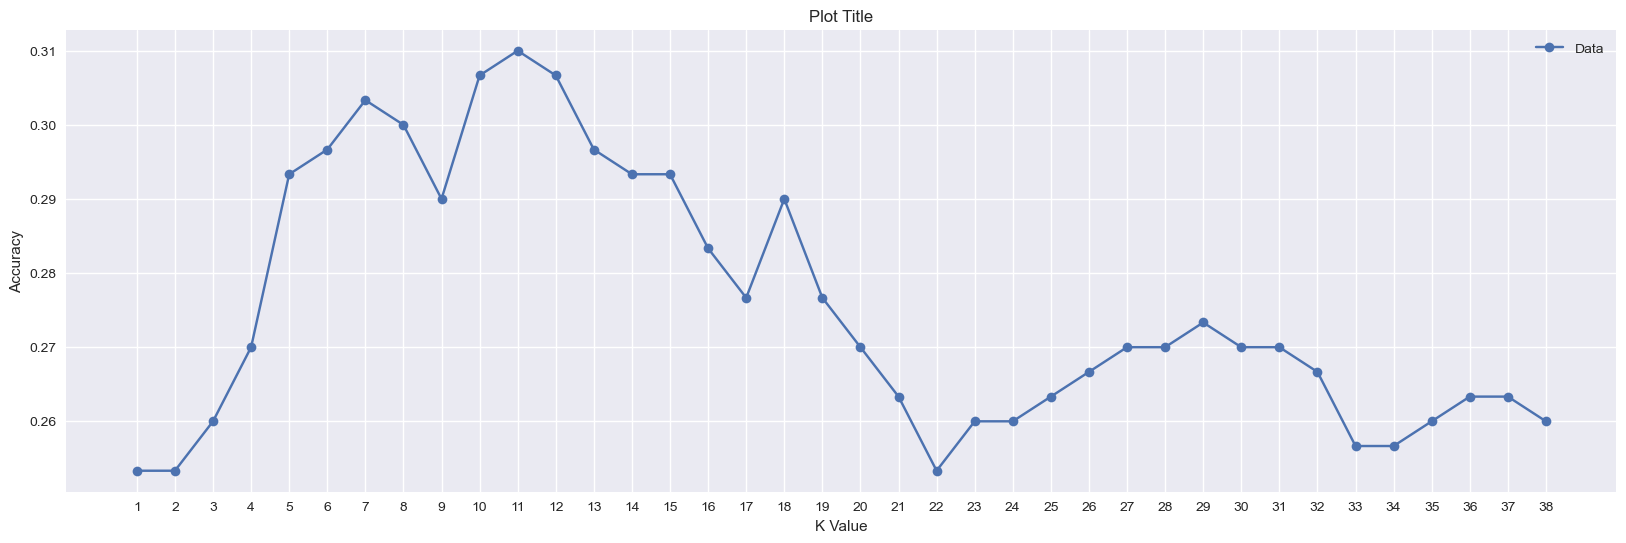

In [46]:
k_vs_acc = k_vs_acc[(k_vs_acc[:, 0] == 'VIT') & (k_vs_acc[:, 1] == 'cosine')]
x_data = k_vs_acc[:, 2].astype(int)
y_data = k_vs_acc[:, 3].astype(float)


plt.figure(figsize=(20, 6))
plt.plot(x_data, y_data, marker='o', linestyle='-', label='Data')

plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(x_data)
plt.title('Plot Title')

plt.grid(True)
plt.legend()

plt.show()

Is it possible to improve the execution time of the program?

In [47]:
initial = np.squeeze(min_max[(min_max[:, 0] == 'VIT') & (
    min_max[:, 1] == "euclidean") & (min_max[:, 2] == "3")])
best = min_max[np.argmax(min_max[:, 3])]
optimized = min_max[np.argmin(min_max[:, 4])]

# [enc, dis, k, pred_and_scores['dict']['accuracy'], pred_and_scores['inference_time']]

In [48]:
print(initial)

['VIT' 'euclidean' '3' '0.26' '0.9631848335266113']


In [49]:
print(best)

['VIT' 'cosine' '11' '0.31' '0.9108293056488037']


In [50]:
print(optimized)

['VIT' 'euclidean' '26' '0.26' '0.4554169178009033']


Make a classifier using sklearn

In [51]:
file = "data.npy"
data = np.load(file, allow_pickle=True)

vit_index = 2
label_index = 3

X_vit = []
for d in data[:, vit_index]:
    X_vit.append(d.reshape(-1))
X_vit = np.array(X_vit)

y = data[:, label_index]

X_vit_train, X_vit_test, y_vit_train, y_vit_test = train_test_split(
    X_vit, y, test_size=0.2, random_state=2)


X_train, X_test, y_train, y_test = X_vit_train, X_vit_test, y_vit_train, y_vit_test

knn_sklearn = KNeighborsClassifier(
    n_neighbors=3, algorithm='auto', weights='distance')
knn_sklearn.fit(X_train, y_train)

sklearn_start = time.time()
y_pred = knn_sklearn.predict(X_test)
sklearn_inference_time = time.time() - sklearn_start

/tmp/ipykernel_18266/2304092241.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')  # Choose a pleasing style


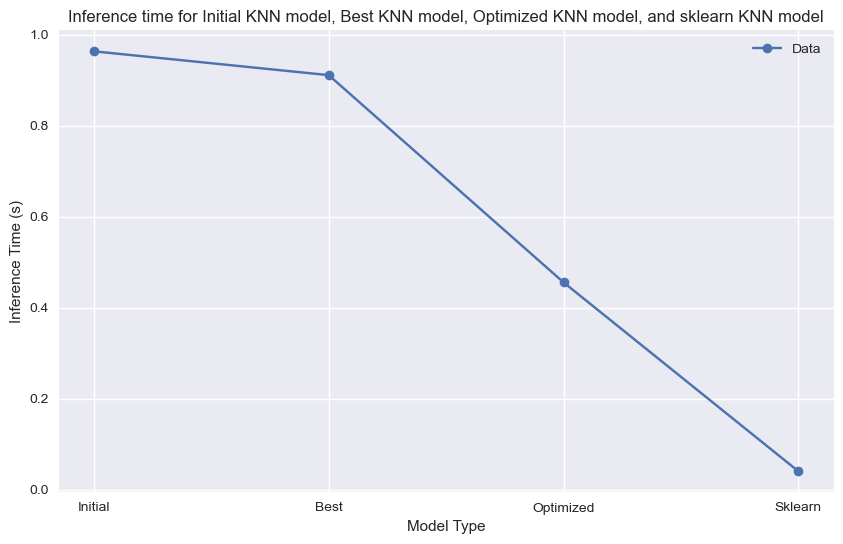

In [52]:
# Plot inference time for initial KNN model, best KNN model, most optimized KNN model, and the default sklearn KNN model.
inference = np.array([
    [initial[4], "Initial"],
    [best[4], "Best"],
    [optimized[4], "Optimized"],
    [sklearn_inference_time, "Sklearn"]
])

x_data = inference[:, 1]
y_data = inference[:, 0].astype(float)

plt.style.use('seaborn')
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, marker='o', linestyle='-', label='Data')

plt.xlabel('Model Type')
plt.ylabel('Inference Time (s)')
plt.xticks(x_data)
plt.title('Inference time for Initial KNN model, Best KNN model, Optimized KNN model, and sklearn KNN model')

plt.grid(True)
plt.legend()

plt.show()

In [53]:
initial_knn = KNNClassifier(
    k=int(initial[2]), distance_metric=initial[1], encoder=initial[0])
best_knn = KNNClassifier(
    k=int(best[2]), distance_metric=best[1], encoder=best[0])
optimized_knn = KNNClassifier(
    k=int(optimized[2]), distance_metric=optimized[1], encoder=optimized[0])
sklearn_knn = KNeighborsClassifier(
    n_neighbors=3, algorithm='auto', weights='distance')

In [54]:
size = initial_knn.X_train.shape[0]
print(size)

dict_inferece_time = {}

dict_inferece_time['size'] = []
dict_inferece_time['initial'] = []
dict_inferece_time['best'] = []
dict_inferece_time['optimized'] = []
dict_inferece_time['sklearn'] = []

while size >= 100:

    dict_inferece_time['size'].append(size)

    initial_knn.X_train = initial_knn.X_train[:size, :]
    initial_knn.y_train = initial_knn.y_train[:size]
    start = time.time()
    initial_knn.predict(initial_knn.X_test)
    dict_inferece_time['initial'].append(time.time() - start)

    best_knn.X_train = best_knn.X_train[:size, :]
    best_knn.y_train = best_knn.y_train[:size]
    start = time.time()
    best_knn.predict(best_knn.X_test)
    dict_inferece_time['best'].append(time.time() - start)

    optimized_knn.X_train = optimized_knn.X_train[:size, :]
    optimized_knn.y_train = optimized_knn.y_train[:size]
    start = time.time()
    optimized_knn.predict(optimized_knn.X_test)
    dict_inferece_time['optimized'].append(time.time() - start)

    X_train = X_train[:size, :]
    y_train = y_train[:size]
    knn_sklearn = KNeighborsClassifier(
        n_neighbors=3, algorithm='auto', weights='distance')
    knn_sklearn.fit(X_train, y_train)
    start = time.time()
    knn_sklearn.predict(X_test)
    dict_inferece_time['sklearn'].append(time.time() - start)

    size -= 50

1200


In [55]:
df = pd.DataFrame(dict_inferece_time)
df

,size,initial,best,optimized,sklearn
0,1200,0.502804,0.642424,0.549816,0.051448
1,1150,0.650728,1.172373,0.624176,0.031305
2,1100,0.597146,0.641611,0.417761,0.026990
3,1050,0.379563,0.464614,0.468514,0.033201
4,1000,0.260146,0.524770,0.487812,0.024232
5,950,0.302803,0.389437,0.477421,0.030882
6,900,0.544340,0.642621,0.371832,0.022732
7,850,0.239702,0.388957,0.194115,0.028877
8,800,0.238636,0.335943,0.415068,0.022130
9,750,0.427697,0.262560,0.311611,0.024430


/tmp/ipykernel_18266/3735447217.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


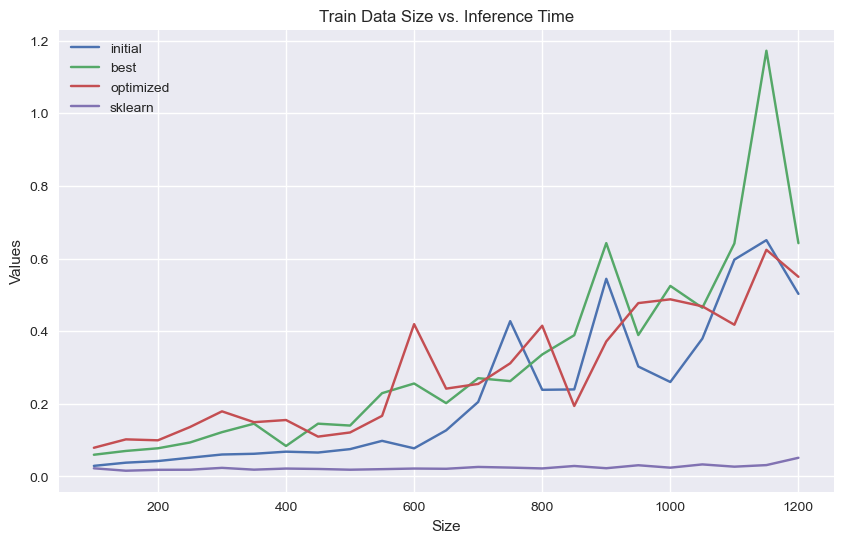

In [56]:
plt.style.use('seaborn')
plt.figure(figsize=(10, 6))
plt.plot(df["size"], df["initial"], label="initial")
plt.plot(df["size"], df["best"], label="best")
plt.plot(df["size"], df["optimized"], label="optimized")
plt.plot(df["size"], df["sklearn"], label="sklearn")
plt.xlabel("Size")
plt.ylabel("Values")
plt.title("Train Data Size vs. Inference Time")
plt.legend()
plt.grid(True)
plt.show()

# Decision Trees


In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold

In [2]:
df = pd.read_csv("advertisement.csv")

In [3]:
df.head()

,age,gender,income,education,married,children,city,occupation,purchase_amount,most bought item,labels
0,45,Male,61271.953359,Master,False,3,Lake Sheila,Doctor,87.697118,monitor,electronics clothing sports
1,24,Female,53229.101074,High School,False,1,Crystalburgh,Businessman,115.135586,lipstick,furniture beauty
2,45,Female,30066.046684,Bachelor,True,3,Margaretburgh,Engineer,101.694559,biscuits,clothing electronics food sports
3,19,Male,48950.246384,PhD,False,0,Williamshaven,Lawyer,97.964887,maggi,food
4,29,Female,44792.627094,Master,False,0,New Paul,Businessman,86.847281,carpet,home


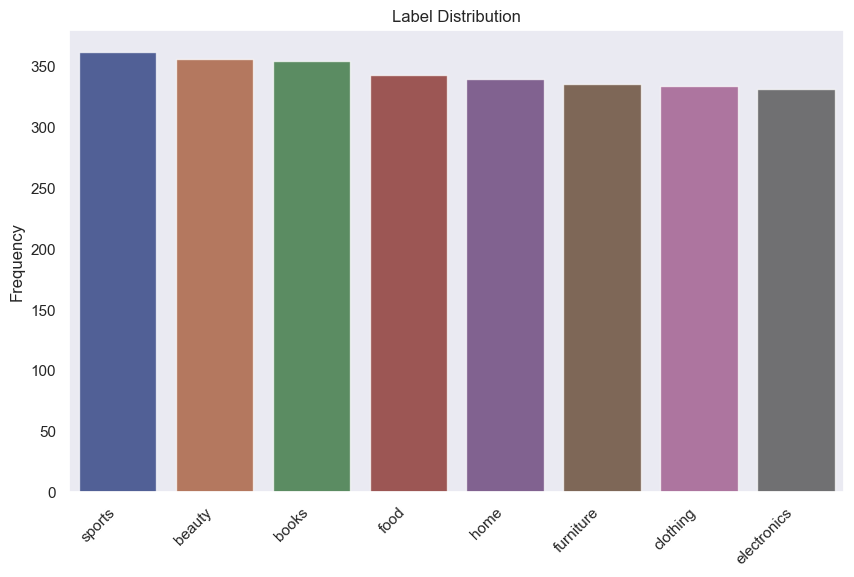

In [4]:
sns.set(style="dark")
dark_palette = sns.color_palette('dark')
label_distribution = df['labels'].str.split().explode().value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=label_distribution.index, y=label_distribution.values,
            palette=dark_palette, alpha=0.7)
plt.title('Label Distribution')
# plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [5]:
df[['age', 'income', 'purchase_amount']].describe()

,age,income,purchase_amount
count,1000.000000,1000.000000,1000.000000
mean,40.836000,49349.796167,101.098170
std,13.786848,9894.479148,20.348736
min,18.000000,21908.867759,23.482179
25%,28.000000,42577.352034,87.699577
50%,41.000000,48993.757137,101.587560
75%,53.000000,56566.795992,114.718926
max,64.000000,79459.294416,168.978628


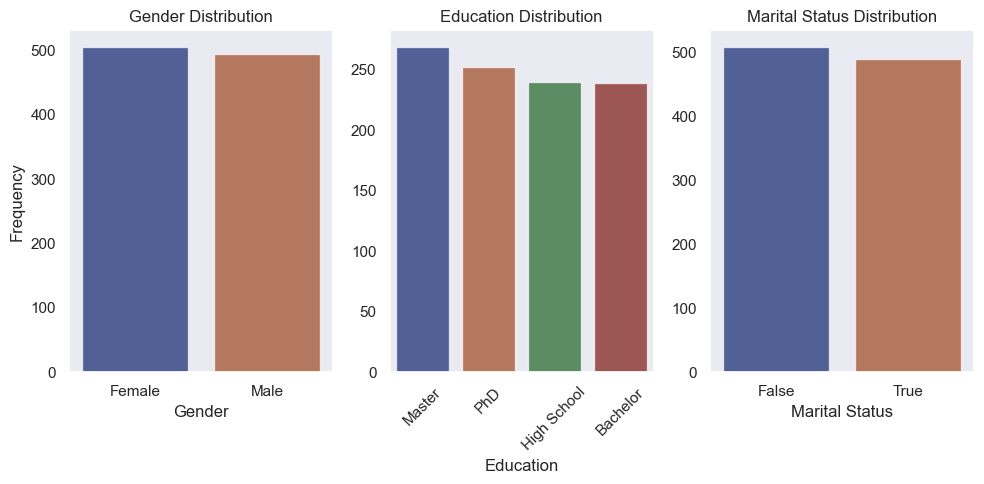

In [6]:
gender_distribution = df['gender'].value_counts()
education_distribution = df['education'].value_counts()
marital_status_distribution = df['married'].value_counts()
occupation_distribution = df['occupation'].value_counts()
most_bought_item_distribution = df['most bought item'].value_counts()

sns.set(style="dark")
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))

sns.barplot(x=gender_distribution.index, y=gender_distribution.values,
            ax=axes[0], palette=dark_palette, alpha=0.7)
axes[0].set_title("Gender Distribution")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Frequency")

sns.barplot(x=education_distribution.index, y=education_distribution.values,
            ax=axes[1], palette=dark_palette, alpha=0.7)
axes[1].set_title("Education Distribution")
axes[1].set_xlabel("Education")
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(x=marital_status_distribution.index,
            y=marital_status_distribution.values, ax=axes[2], palette=dark_palette, alpha=0.7)
axes[2].set_title("Marital Status Distribution")
axes[2].set_xlabel("Marital Status")
plt.tight_layout()
plt.show()

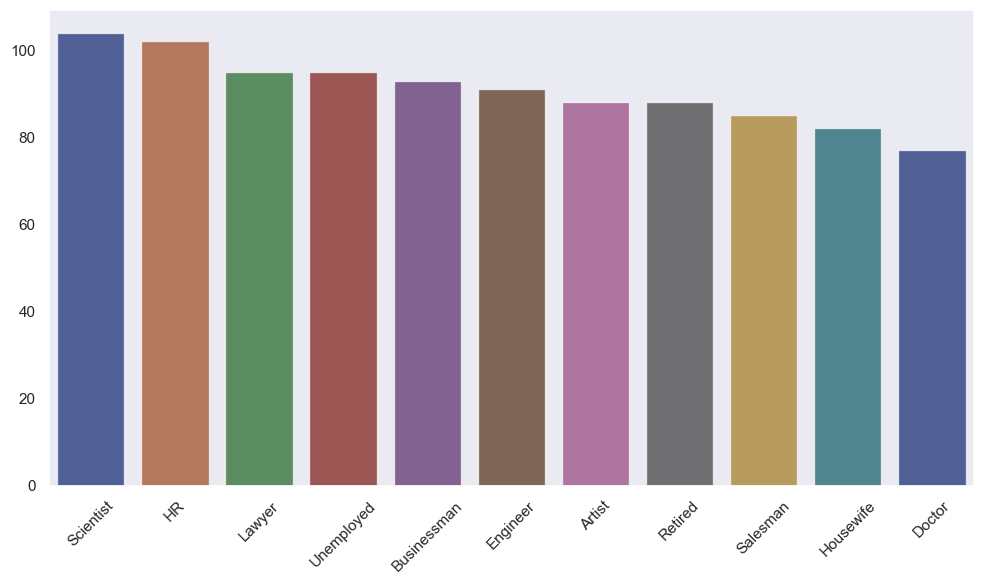

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x=occupation_distribution.index,
            y=occupation_distribution.values, palette=dark_palette, alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

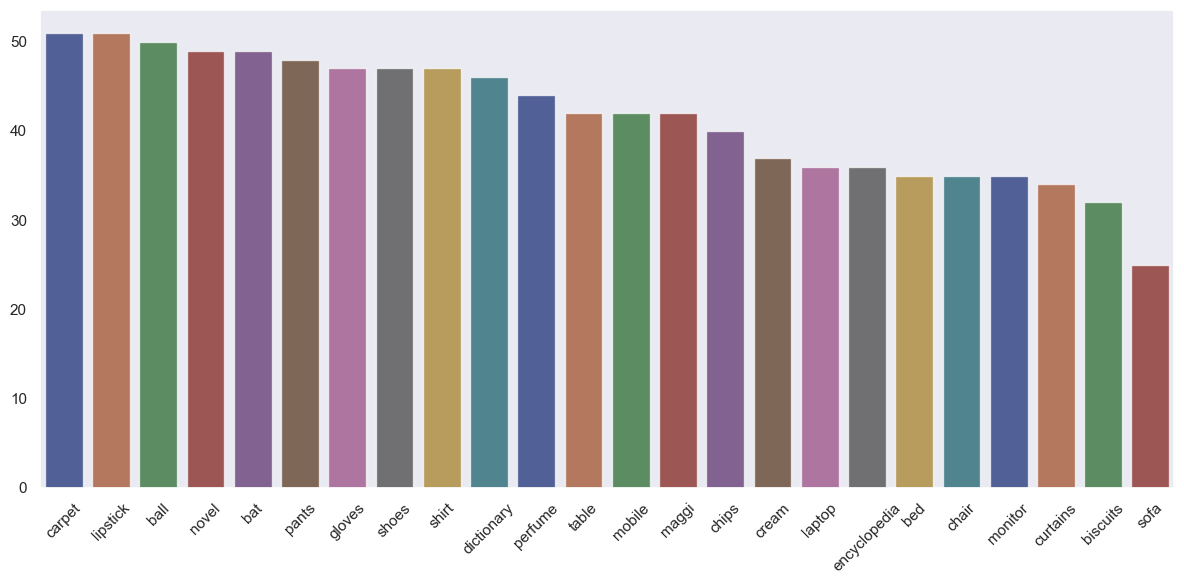

In [8]:
plt.figure(figsize=(12, 6))
sns.barplot(x=most_bought_item_distribution.index,
            y=most_bought_item_distribution.values, palette=dark_palette, alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

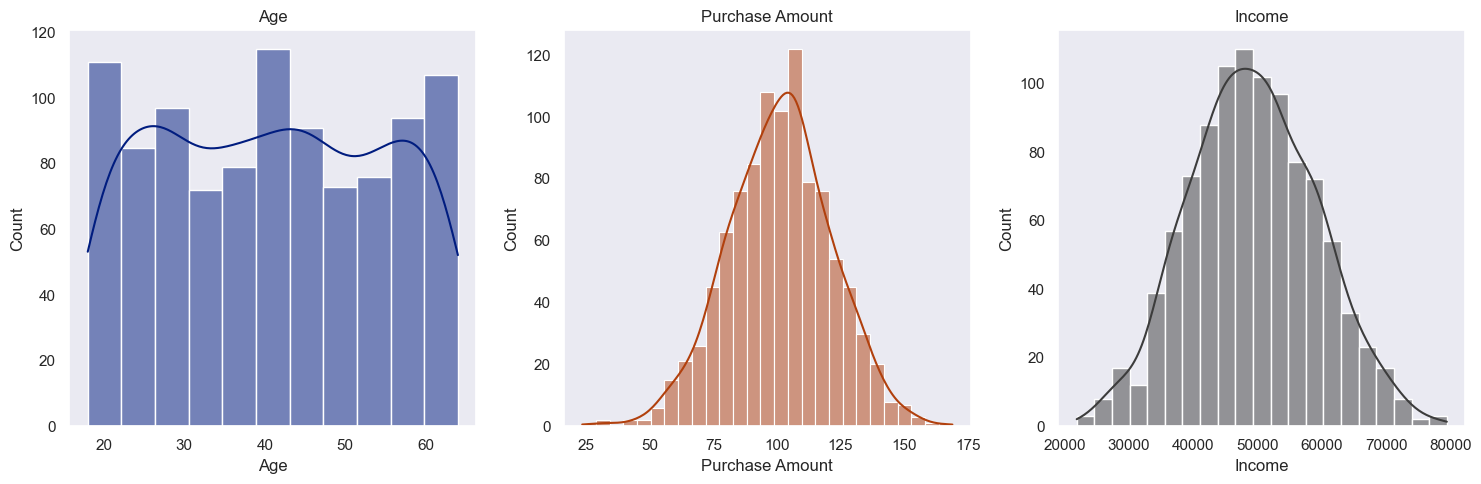

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.histplot(data=df, x="age", ax=axes[0], kde=True, color=dark_palette[0])
axes[0].set_title("Age")
axes[0].set_xlabel("Age")

sns.histplot(data=df, x="purchase_amount",
             ax=axes[1], kde=True, color=dark_palette[1])
axes[1].set_title("Purchase Amount")
axes[1].set_xlabel("Purchase Amount")

sns.histplot(data=df, x="income", ax=axes[2], kde=True, color=dark_palette[7])
axes[2].set_title("Income")
axes[2].set_xlabel("Income")

plt.tight_layout()

plt.show()

In [10]:
df.head()

,age,gender,income,education,married,children,city,occupation,purchase_amount,most bought item,labels
0,45,Male,61271.953359,Master,False,3,Lake Sheila,Doctor,87.697118,monitor,electronics clothing sports
1,24,Female,53229.101074,High School,False,1,Crystalburgh,Businessman,115.135586,lipstick,furniture beauty
2,45,Female,30066.046684,Bachelor,True,3,Margaretburgh,Engineer,101.694559,biscuits,clothing electronics food sports
3,19,Male,48950.246384,PhD,False,0,Williamshaven,Lawyer,97.964887,maggi,food
4,29,Female,44792.627094,Master,False,0,New Paul,Businessman,86.847281,carpet,home


In [11]:
print(df.city.value_counts())
# city column is useless

Michaelberg     3
East John       3
West Robert     2
New Kathryn     2
North Andrew    2
               ..
Rosstown        1
Kevintown       1
Kirkland        1
New Monica      1
Port Jose       1
Name: city, Length: 969, dtype: int64


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


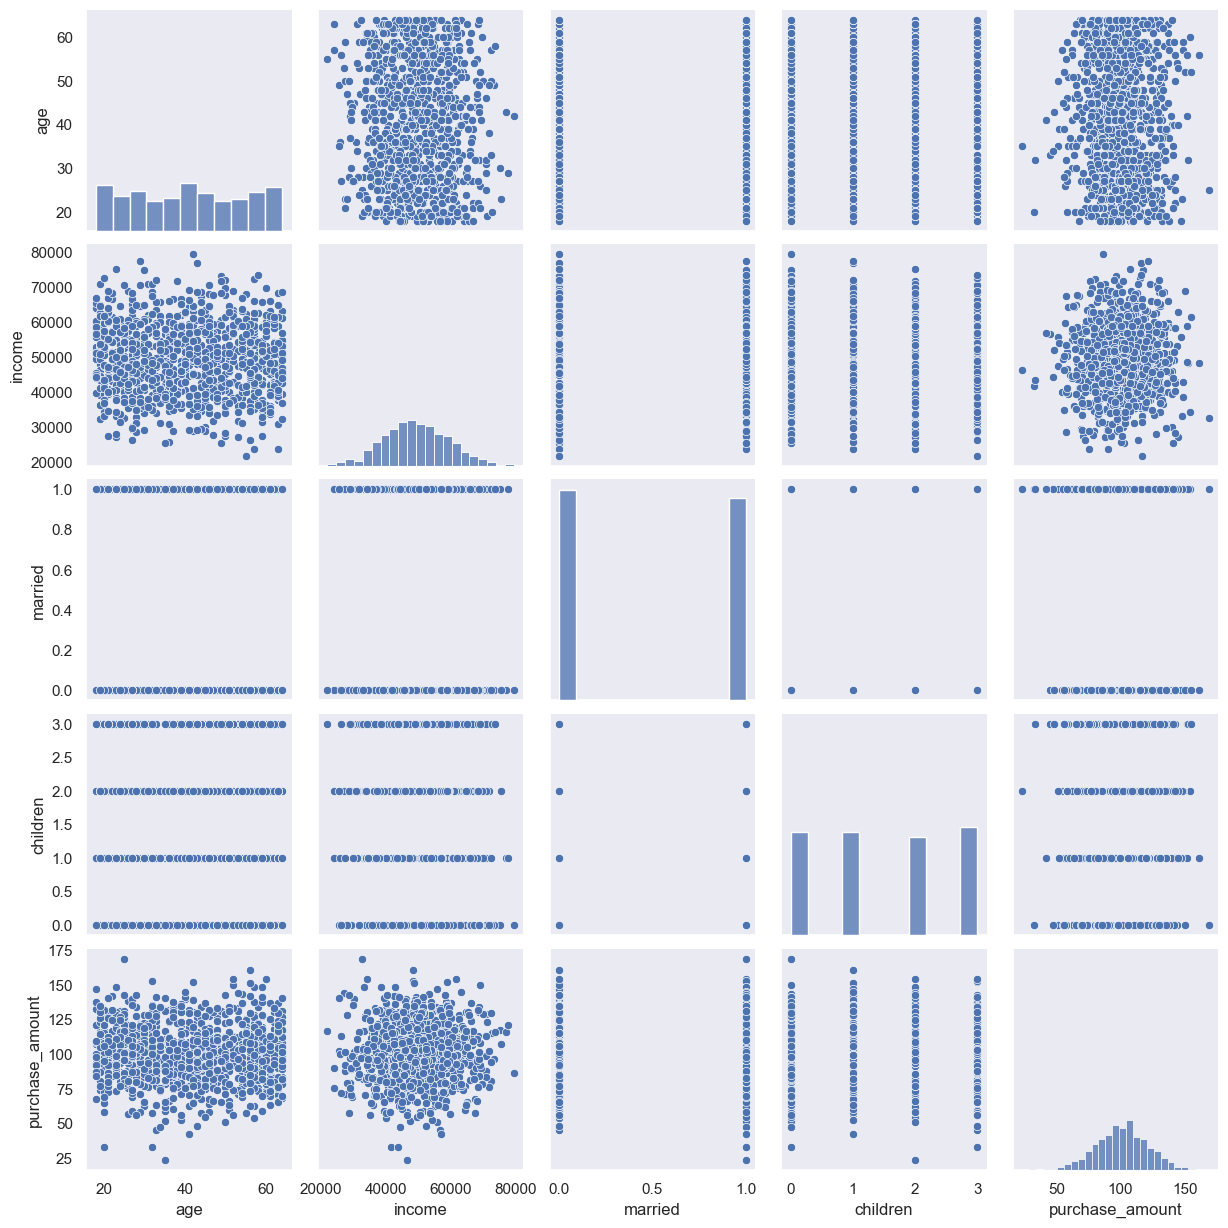

In [12]:
sns.pairplot(df)

# Dropping 'city' almost 970 diff cities

# multi-output formulation

In [13]:
# unique = np.sort(df['labels'].str.split().explode().unique())
# lb = LabelBinarizer()
# binary_labels = lb.fit_transform(unique)
# print(binary_labels)
# dict = {unique[i]: i for i in range(0, len(unique))}
# reverse_dict = {i: unique[i] for i in range(0, len(unique))}

# dict
# def encode_y(y):
#     encoding = np.zeros((len(y), len(unique)))

#     for i, x in enumerate(y.str.split()):
#         for k in x:
#             encoding[i, dict[k]] = 1
#     return encoding

In [14]:
df.head()

,age,gender,income,education,married,children,city,occupation,purchase_amount,most bought item,labels
0,45,Male,61271.953359,Master,False,3,Lake Sheila,Doctor,87.697118,monitor,electronics clothing sports
1,24,Female,53229.101074,High School,False,1,Crystalburgh,Businessman,115.135586,lipstick,furniture beauty
2,45,Female,30066.046684,Bachelor,True,3,Margaretburgh,Engineer,101.694559,biscuits,clothing electronics food sports
3,19,Male,48950.246384,PhD,False,0,Williamshaven,Lawyer,97.964887,maggi,food
4,29,Female,44792.627094,Master,False,0,New Paul,Businessman,86.847281,carpet,home


In [15]:
mlb = MultiLabelBinarizer()

df_multioutput = df.copy()
# X_dt = df_multioutput.drop(['labels', 'city'], axis=1).apply(lambda col: le_multioutput.transform(col) if col.name not in ['income'] else col)
# X_dt = df_multioutput['gender', 'education', 'married', 'occupation', 'most bought item'].get_dummies()
X_dt = df_multioutput[['age', 'gender', 'income', 'education', 'married',
                       'children',  'occupation', 'purchase_amount', 'most bought item']]
columnx = ['gender', 'education', 'married', 'occupation', 'most bought item']
X_dt = pd.get_dummies(X_dt, columns=columnx)
y_dt = mlb.fit_transform(
    df_multioutput['labels'].apply(lambda x: np.sort(x.split())))


X_train, X_test, y_train, y_test = train_test_split(
    X_dt, y_dt, test_size=0.2, random_state=42)

In [16]:
class MultiOutputFormulation():
    def __init__(self, max_depth=30, max_features=11, criterion='gini', ):
        self.max_depth = max_depth
        self.criterion = criterion
        self.max_features = max_features
        self.model = MultiOutputClassifier(DecisionTreeClassifier(
            max_depth=self.max_depth, criterion=self.criterion, max_features=self.max_features))

    def fit(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        return self.model.predict(X_test)

    def score(self, y_test, y_pred):
        acc = (y_test == y_pred).sum() / (y_test.shape[0] * y_test.shape[1])
        acc_sklearn = accuracy_score(y_pred=y_pred, y_true=y_test)
        f1_micro = f1_score(y_pred=y_pred, y_true=y_test, average='micro')
        f1_macro = f1_score(y_pred=y_pred, y_true=y_test, average='macro')
        precision = precision_score(
            y_pred=y_pred, y_true=y_test, average='macro')
        recall = recall_score(y_pred=y_pred, y_true=y_test, average='macro')
        precision_micro = precision_score(
            y_pred=y_pred, y_true=y_test, average='micro')
        recall_micro = recall_score(
            y_pred=y_pred, y_true=y_test, average='micro')

        return acc, acc_sklearn, f1_micro, f1_macro, precision, recall, precision_micro, recall_micro

In [17]:
# fa = MultiOutputFormulation()
# fa.fit(X_train, y_train)
# y_pred = fa.predict(X_test)
# acc, acc_sklearn, f1_mi, f1_ma, pr_mac, rec_mac, pre_mic, rec_mic = fa.score(y_test, y_pred)

# print("Accuracy:", acc, acc_sklearn)
# print("F1 Micro:", f1_mi)
# print("F1 Macro:", f1_ma)
# print("Precision Macro:", pr_mac)
# print("Recall Macro:", rec_mac)
# print("Precision Micro:", pre_mic)
# print("Recall Micro:", rec_mic)

# POWERSET

In [18]:
df_powerset = df.copy()

df_powerset['labels'] = df_powerset['labels'].map(
    lambda x: " ".join(np.sort(x.split())))


# xle_powerset = LabelEncoder()
yle_powerset = LabelEncoder()

X_ps = df_multioutput[['age', 'gender', 'income', 'education', 'married',
                       'children',  'occupation', 'purchase_amount', 'most bought item']]
columnx = ['gender', 'education', 'married', 'occupation', 'most bought item']
X_ps = pd.get_dummies(X_ps, columns=columnx)

# X_ps = df_powerset.drop(['labels', 'city'], axis=1).apply(lambda col: xle_powerset.fit_transform(col) if col.name not in ['income'] else col)
y_ps = yle_powerset.fit_transform(df_powerset['labels'])

X_train, X_test, y_train, y_test = train_test_split(
    X_ps, y_ps, test_size=0.2, random_state=42)

In [19]:
class PowerSetFormulation():
    def __init__(self, max_depth=30, max_features=11, criterion='gini', ):
        self.max_depth = max_depth
        self.criterion = criterion
        self.max_features = max_features
        self.model = DecisionTreeClassifier(
            max_depth=self.max_depth, criterion=self.criterion, max_features=self.max_features)

    def fit(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        return self.model.predict(X_test)

    def scores(self, y_pred, y_test):
        return accuracy_score(y_pred=y_pred, y_true=y_test), precision_score(y_pred=y_pred, y_true=y_test, average='macro', zero_division=0), recall_score(y_pred=y_pred, y_true=y_test, average='macro', zero_division=0), f1_score(y_pred=y_pred, y_true=y_test, average='macro'), precision_score(y_pred=y_pred, y_true=y_test, average='micro', zero_division=0), recall_score(y_pred=y_pred, y_true=y_test, average='micro', zero_division=0), f1_score(y_pred=y_pred, y_true=y_test, average='micro')

In [20]:
# faadf = PowerSetFormulation()
# faadf.fit(X_train, y_train)
# y_pred = faadf.predict(X_test)
# acc, prec, rec, f1, pre_mic, rec_mic, f1_mic = faadf.scores(y_pred, y_test)
# print("Accuracy:", acc)
# print("Precision:", prec)
# print("Recall:", rec)
# print("F1:", f1)
# print("Precision Micro:", pre_mic)
# print("Recall Micro:", rec_mic)
# print("F1 Micro:", f1_mic)

# Hyperparameter tuning

# MultiOutputClassifier

In [21]:
mlb = MultiLabelBinarizer()

df_multioutput = df.copy()
# X_dt = df_multioutput.drop(['labels', 'city'], axis=1).apply(lambda col: le_multioutput.transform(col) if col.name not in ['income'] else col)
# X_dt = df_multioutput['gender', 'education', 'married', 'occupation', 'most bought item'].get_dummies()
X_dt = df_multioutput[['age', 'gender', 'income', 'education', 'married',
                       'children',  'occupation', 'purchase_amount', 'most bought item']]
columnx = ['gender', 'education', 'married', 'occupation', 'most bought item']
X_dt = pd.get_dummies(X_dt, columns=columnx)
y_dt = mlb.fit_transform(
    df_multioutput['labels'].apply(lambda x: np.sort(x.split())))


X_train, X_test, y_train, y_test = train_test_split(
    X_dt, y_dt, test_size=0.2, random_state=42)

In [22]:
print("MultiOutputFormulation")
list = []
for x in ['gini', 'entropy']:
    for depth in [3, 5, 10, 20, 30]:
        for feature in [3, 5, 7, 9, 11]:
            clf_dt = MultiOutputFormulation(
                max_depth=depth, max_features=feature, criterion=x)
            clf_dt.fit(X_train, y_train)
            y_pred = clf_dt.predict(X_test)
            acc, acc_sklearn, f1_mi, f1_ma, pr_mac, rec_mac, pre_mic, rec_mic = clf_dt.score(
                y_test, y_pred)
            print("Criterion", x, "Depth", depth, "Feature", feature)
            print("Accuracy:", acc)
            print("Accuracy Sklearn:", acc_sklearn)
            print("F1 Micro:", f1_mi)
            print("F1 Macro:", f1_ma)
            print("Precision Macro:", pr_mac)
            print("Recall Macro:", rec_mac)
            print("Precision Micro:", pre_mic)
            print("Recall Micro:", rec_mic)
            print(multilabel_confusion_matrix(y_true=y_test, y_pred=y_pred))
            list.append([x, depth, feature, f1_mi])

top_3_mo = np.array(list)

MultiOutputFormulation
Criterion gini Depth 3 Feature 3
Accuracy: 0.701875
Accuracy Sklearn: 0.025
F1 Micro: 0.19289340101522842
F1 Macro: 0.18483456916168442
Precision Macro: 0.7670454545454546
Recall Macro: 0.10734455741468155
Precision Micro: 0.890625
Recall Micro: 0.10815939278937381
[[[132   0]
  [ 51  17]]

 [[134   0]
  [ 56  10]]

 [[137   0]
  [ 56   7]]

 [[136   1]
  [ 63   0]]

 [[137   4]
  [ 52   7]]

 [[132   2]
  [ 64   2]]

 [[129   0]
  [ 65   6]]

 [[129   0]
  [ 63   8]]]
Criterion gini Depth 3 Feature 5
Accuracy: 0.7
Accuracy Sklearn: 0.025
F1 Micro: 0.19463087248322147
F1 Macro: 0.18024186776035228
Precision Macro: 0.8040342809364549
Recall Macro: 0.10764024335545688
Precision Micro: 0.8405797101449275
Recall Micro: 0.11005692599620494
[[[132   0]
  [ 60   8]]

 [[131   3]
  [ 56  10]]

 [[133   4]
  [ 63   0]]

 [[137   0]
  [ 62   1]]

 [[139   2]
  [ 53   6]]

 [[134   0]
  [ 57   9]]

 [[127   2]
  [ 50  21]]

 [[129   0]
  [ 68   3]]]
Criterion gini Depth 3 F

/home/prakhar/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Criterion gini Depth 3 Feature 11
Accuracy: 0.713125
Accuracy Sklearn: 0.055
F1 Micro: 0.27027027027027023
F1 Macro: 0.26884801025958016
Precision Macro: 0.8566964285714286
Recall Macro: 0.16262802792869285
Precision Micro: 0.8333333333333334
Recall Micro: 0.16129032258064516
[[[132   0]
  [ 55  13]]

 [[122  12]
  [ 62   4]]

 [[134   3]
  [ 51  12]]

 [[136   1]
  [ 56   7]]

 [[140   1]
  [ 46  13]]

 [[134   0]
  [ 47  19]]

 [[129   0]
  [ 65   6]]

 [[129   0]
  [ 60  11]]]
Criterion gini Depth 5 Feature 3
Accuracy: 0.70125
Accuracy Sklearn: 0.03
F1 Micro: 0.2436708860759494
F1 Macro: 0.23612745658858547
Precision Macro: 0.8201388888888889
Recall Macro: 0.14756855888039802
Precision Micro: 0.7333333333333333
Recall Micro: 0.1461100569259962
[[[132   0]
  [ 56  12]]

 [[134   0]
  [ 51  15]]

 [[115  22]
  [ 45  18]]

 [[134   3]
  [ 57   6]]

 [[139   2]
  [ 52   7]]

 [[134   0]
  [ 57   9]]

 [[128   1]
  [ 69   2]]

 [[129   0]
  [ 63   8]]]
Criterion gini Depth 5 Feature 5
Ac

/home/prakhar/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/prakhar/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Criterion entropy Depth 3 Feature 7
Accuracy: 0.703125
Accuracy Sklearn: 0.045
F1 Micro: 0.2351046698872786
F1 Macro: 0.22077442206822262
Precision Macro: 0.7711309523809524
Recall Macro: 0.1354286998261764
Precision Micro: 0.776595744680851
Recall Micro: 0.13851992409867173
[[[132   0]
  [ 60   8]]

 [[125   9]
  [ 55  11]]

 [[137   0]
  [ 55   8]]

 [[136   1]
  [ 61   2]]

 [[140   1]
  [ 57   2]]

 [[134   0]
  [ 52  14]]

 [[119  10]
  [ 67   4]]

 [[129   0]
  [ 47  24]]]
Criterion entropy Depth 3 Feature 9
Accuracy: 0.725
Accuracy Sklearn: 0.055
F1 Micro: 0.31464174454828664
F1 Macro: 0.3087524922031715
Precision Macro: 0.8847402597402598
Recall Macro: 0.19148175367501544
Precision Micro: 0.8782608695652174
Recall Micro: 0.19165085388994307
[[[121  11]
  [ 65   3]]

 [[134   0]
  [ 46  20]]

 [[137   0]
  [ 46  17]]

 [[137   0]
  [ 56   7]]

 [[141   0]
  [ 51   8]]

 [[131   3]
  [ 47  19]]

 [[129   0]
  [ 55  16]]

 [[129   0]
  [ 60  11]]]
Criterion entropy Depth 3 Feature

In [23]:
top_3_mo[np.flip(np.argsort(top_3_mo[:, 3]))[:3]]

array([['entropy', '20', '9', '0.518444666001994'],
       ['entropy', '30', '9', '0.5121731289449954'],
       ['entropy', '30', '11', '0.5092250922509225']], dtype='<U32')

# PowerSet


In [24]:
df_powerset = df.copy()

df_powerset['labels'] = df_powerset['labels'].map(
    lambda x: " ".join(np.sort(x.split())))


# xle_powerset = LabelEncoder()
yle_powerset = LabelEncoder()

X_ps = df_multioutput[['age', 'gender', 'income', 'education', 'married',
                       'children',  'occupation', 'purchase_amount', 'most bought item']]
columnx = ['gender', 'education', 'married', 'occupation', 'most bought item']
X_ps = pd.get_dummies(X_ps, columns=columnx)

# X_ps = df_powerset.drop(['labels', 'city'], axis=1).apply(lambda col: xle_powerset.fit_transform(col) if col.name not in ['income'] else col)
y_ps = yle_powerset.fit_transform(df_powerset['labels'])

X_train, X_test, y_train, y_test = train_test_split(
    X_ps, y_ps, test_size=0.2, random_state=42)

In [25]:
for x in ['gini', 'entropy']:
    for depth in [3, 5, 10, 20, 30]:
        for feature in [3, 5, 7, 9, 11]:
            clf_pow = PowerSetFormulation(
                max_depth=depth, max_features=feature, criterion=x)
            clf_pow.fit(X_train, y_train)
            y_pred = clf_pow.predict(X_test)
            acc, prec, rec, f1, pre_mic, rec_mic, f1_mic = clf_pow.scores(
                y_pred, y_test)
            print("Criterion", x, "Depth", depth, "Feature", feature)
            print("Accuracy:", acc)
            print("Precision:", prec)
            print("Recall:", rec)
            print("F1:", f1)
            print("Precision Micro:", pre_mic)
            print("Recall Micro:", rec_mic)
            print("F1 Micro:", f1_mic)
            print(confusion_matrix(y_pred=y_pred, y_true=y_test))
            list.append([x, depth, feature, f1_mic])
top_3_ps = np.array(list)

Criterion gini Depth 3 Feature 3
Accuracy: 0.025
Precision: 0.0013986397542781921
Recall: 0.012264150943396227
F1: 0.0023131862274810787
Precision Micro: 0.025
Recall Micro: 0.025
F1 Micro: 0.025000000000000005
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Criterion gini Depth 3 Feature 5
Accuracy: 0.035
Precision: 0.00264797507788162
Recall: 0.011214953271028037
F1: 0.002679797675275517
Precision Micro: 0.035
Recall Micro: 0.035
F1 Micro: 0.035
[[0 0 0 ... 0 0 4]
 [0 0 0 ... 0 0 3]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 2]
 [0 0 0 ... 0 0 3]
 [0 0 0 ... 0 0 6]]
Criterion gini Depth 3 Feature 7
Accuracy: 0.045
Precision: 0.0037807318467695827
Recall: 0.016352201257861635
F1: 0.0052002658828408
Precision Micro: 0.045
Recall Micro: 0.045
F1 Micro: 0.045
[[0 0 0 ... 0 0 4]
 [0 0 0 ... 0 0 3]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 2]
 [0 0 0 ... 0 0 3]
 [0 0 0 ... 0 0 6]]
Criterion gini Depth 3 Feature 9
Accuracy: 

In [26]:
top_3_ps[np.flip(np.argsort(top_3_ps[:, 3]))[:3]]

array([['entropy', '20', '9', '0.518444666001994'],
       ['entropy', '30', '9', '0.5121731289449954'],
       ['entropy', '30', '11', '0.5092250922509225']], dtype='<U32')

In [27]:
# np.sort(df['labels'].str.split().explode().unique())

# K Fold Cross Validation

# Multi Output Formulation

In [41]:
kf = KFold(n_splits=6, shuffle=True, random_state=42)

In [47]:
mlb = MultiLabelBinarizer()

df_multioutput = df.copy()
# X_dt = df_multioutput.drop(['labels', 'city'], axis=1).apply(lambda col: le_multioutput.transform(col) if col.name not in ['income'] else col)
# X_dt = df_multioutput['gender', 'education', 'married', 'occupation', 'most bought item'].get_dummies()
X_dt = df_multioutput[['age', 'gender', 'income', 'education', 'married',
                       'children',  'occupation', 'purchase_amount', 'most bought item']]
columnx = ['gender', 'education', 'married', 'occupation', 'most bought item']
X_dt = pd.get_dummies(X_dt, columns=columnx)
y_dt = mlb.fit_transform(
    df_multioutput['labels'].apply(lambda x: np.sort(x.split())))


# X_train, X_test, y_train, y_test = train_test_split(X_dt, y_dt, test_size=0.2, random_state=42)

In [53]:
params = top_3_ps[np.flip(np.argsort(top_3_ps[:, 3]))[:1]]
accuracy_scores = []
for train_index, test_index in kf.split(X_dt, y_dt):
    X_train, X_test = X_dt.iloc[train_index], X_dt.iloc[test_index]
    y_train, y_test = y_dt[train_index], y_dt[test_index]

    clf_dt = MultiOutputFormulation(criterion=params[0, 0], max_depth=int(
        params[0, 1]), max_features=int(params[0, 2]))
    clf_dt.fit(X_train, y_train)
    y_pred = clf_dt.predict(X_test)
    _, acc_sklearn, _, _, _, _, _, _ = clf_dt.score(y_test, y_pred)
    accuracy_scores.append(acc_sklearn)

In [54]:
np.mean(accuracy_scores)

0.03599427650722651

# Power Set Formulation

In [ ]:
kf = KFold(n_splits=6, shuffle=True, random_state=42)

In [55]:
df_powerset = df.copy()

df_powerset['labels'] = df_powerset['labels'].map(
    lambda x: " ".join(np.sort(x.split())))


# xle_powerset = LabelEncoder()
yle_powerset = LabelEncoder()

X_ps = df_multioutput[['age', 'gender', 'income', 'education', 'married',
                       'children',  'occupation', 'purchase_amount', 'most bought item']]
columnx = ['gender', 'education', 'married', 'occupation', 'most bought item']
X_ps = pd.get_dummies(X_ps, columns=columnx)

# X_ps = df_powerset.drop(['labels', 'city'], axis=1).apply(lambda col: xle_powerset.fit_transform(col) if col.name not in ['income'] else col)
y_ps = yle_powerset.fit_transform(df_powerset['labels'])

# X_train, X_test, y_train, y_test = train_test_split(X_ps, y_ps, test_size=0.2, random_state=42)

In [60]:
params = top_3_ps[np.flip(np.argsort(top_3_ps[:, 3]))[:1]]
accuracy_scores = []
for tain_index, test_index in kf.split(X_ps, y_ps):
    X_train, X_test = X_ps.iloc[train_index], X_ps.iloc[test_index]
    y_train, y_test = y_ps[train_index], y_ps[test_index]

    clf_pow = PowerSetFormulation(criterion=params[0, 0], max_depth=int(
        params[0, 1]), max_features=int(params[0, 2]))

    clf_pow.fit(X_train, y_train)
    y_pred = clf_pow.predict(X_test)
    acc, _, _, _, _, _, _ = clf_pow.scores(y_pred, y_test)
    accuracy_scores.append(acc)

In [61]:
np.mean(accuracy_scores)

0.8353413654618475